### Model Training Time Benchmark
Sheun Aluko CS230 

#### Dependency Imports

In [4]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  


# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

# config 
plt.rcParams["figure.figsize"] = (20,10)
u.reload() 

Reloaded: util
Reloaded: ml_helpers


#### Load Data

In [2]:
data_fraction = 0.01
data = u.data_load(f=data_fraction)
print("Train Size: {}\nVal Size: {}".format(str(len(data[0])),str(len(data[2]))) ) 


Loading data for term index: 8
Fraction of data that will be loaded=0.01

Loading train set
Removed 6 lesion(s) of 1995
Done

Loading val set
Removed 0 lesion(s) of 179
Done

Loading test set
Removed 1 lesion(s) of 203
Done

Train Size: 19
Val Size: 1
Train Size: 19
Val Size: 1


In [ ]:
v = ml.get_baseline_vgg_model_no_pool() 
v.summary()

#### Hyperparamater Search (Batch Size)

In [ ]:
num_epochs = 1 
model_id = 'vgg_co_baseline'

results = [] 
for b in  [1]  : 
    result = ml.run_model(data=data,batch_size=b,num_epochs=num_epochs,model_id=model_id,save=False,multi_gpu=True)
    results.append(result) 

p =  ml.benchmark_bar(results, "Model Train Time (2 GPU,1 Epoch) vs Batch Size") 


In [ ]:
p =  ml.benchmark_bar(results, "Model Train Time (1 GPU,1 Epoch) vs Batch Size") 


Using provided data


Runing model:: vVCB19_e1_b1_lr0.001


Fitting multi_GPU=[False] model with bs=1,epochs=1,lr=0.001

Train on 19 samples, validate on 1 samples
19/19 [==============================] - 18s 958ms/sample - loss: 414969.4312 - IoU: 0.0000e+00 - val_loss: 0.1306 - val_IoU: 0.0000e+00


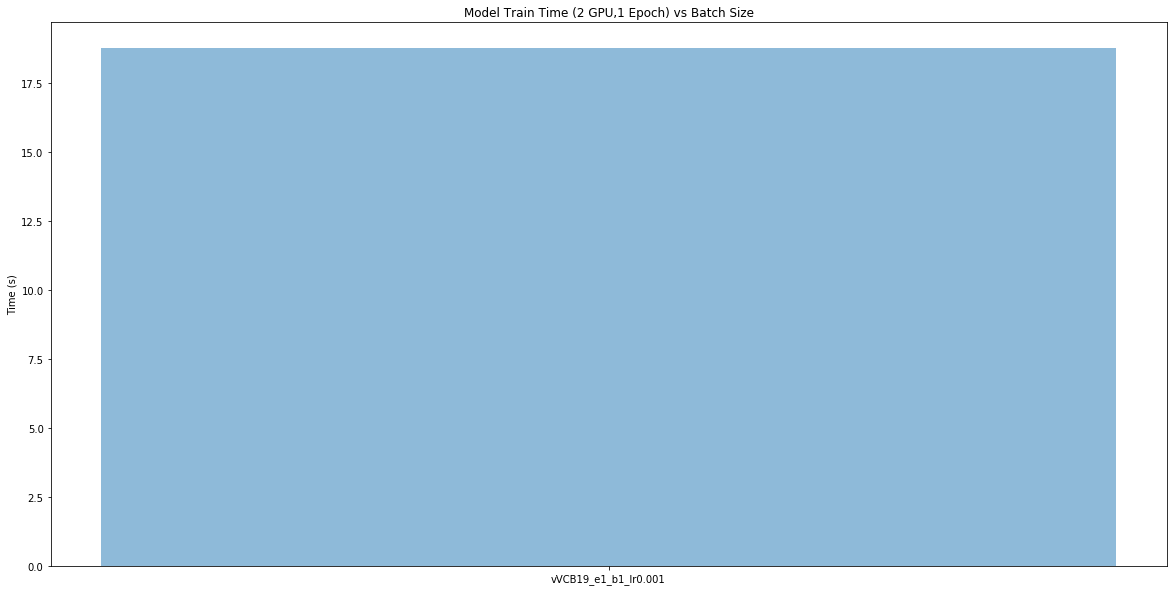

In [5]:
num_epochs = 20
model_id = 'vgg_co_baseline'

results = [] 
for b in  [1]  : 
    result = ml.run_model(data=data,batch_size=b,num_epochs=num_epochs,model_id=model_id,save=False,multi_gpu=False)
    results.append(result) 

p =  ml.benchmark_bar(results, "Model Train Time (2 GPU,1 Epoch) vs Batch Size") 


In [ ]:
p.savefig("models/figures/hyperparam_vgg.png")

#### Hyperparamater Search (Learning Rate) 

In [ ]:
#no dropout (NEXT STEP --- TRAIN RAW VGG !!! )

In [ ]:
#vgg_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape = (512,512,3) )
#vgg_model.summary()

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline_vgg_block4tr'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          #dropout=0.1,
                          model_id=model_id)
    results.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
#with dropout

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline_vgg_block4tr'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          dropout=0.1,
                          model_id=model_id)
    results.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results3 = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          #dropout=0.1,
                          model_id=model_id)
    results3.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
#4
for result in results : 
        print(result['name'])
        ml.train_curve(result['train_info'].history)